<a href="https://colab.research.google.com/github/AbbyNyakara/Mushroom-Classification/blob/main/STT_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DEPENDACIES

In [30]:
# Import libraries:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [6]:
# No gpu connected?? yikes
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[]


In [7]:
# Setup GPU memory consumption growth: Avoid the OOM error:

# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu, True)


# Load the data

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Load data

dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Statistics/Project/Dataset')

Found 28759 files belonging to 2 classes.


## 2. Check the images/classification and  Split the data:

In [33]:
# Training set (80% of the data)
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Statistics/Project/Dataset',
    validation_split=0.2,
    subset="training",
    seed=123
)

# Validation set(20% of the data)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Statistics/Project/Dataset',
    validation_split=0.2,
    subset="validation",
    seed=123
)


Found 28759 files belonging to 2 classes.
Using 23008 files for training.
Found 28759 files belonging to 2 classes.
Using 5751 files for validation.


In [34]:
# Define the batch-size: (Feed in 64 images at a time into the model to keep it running:)

batch_size = 64

# Print the classNames:
class_names = dataset.class_names
print(class_names)

['Edible Mushrooms', 'Inedible Mushrooms']


# 2. DATA PREPROCESSING:
- Resize the images
- Normalize the Images
- Data Augmentation for edible class to be done on the fly as at the training :

In [1]:
# Resize the images:

size = (256, 256)
# Use a labda function to resize all the images for both the training and validatioon sets:
train_ds1 = train_ds.map(lambda image, label:(tf.image.resize(image, size), label))
validation_ds1 = validation_ds.map(lambda image, label:(tf.image.resize(image, size), label))

NameError: name 'train_ds' is not defined

In [43]:
# Normalize the images to a common value:
train_ds = train_ds1.map(lambda image, label: (image/255.0, label))
validation_ds = validation_ds1.map(lambda image, label: (image/255.0, label))


# 3. Exploratory Data Analysis (EDA)

- Check for any outliers in the images
- Display a few random images
- Imbalances in the data:

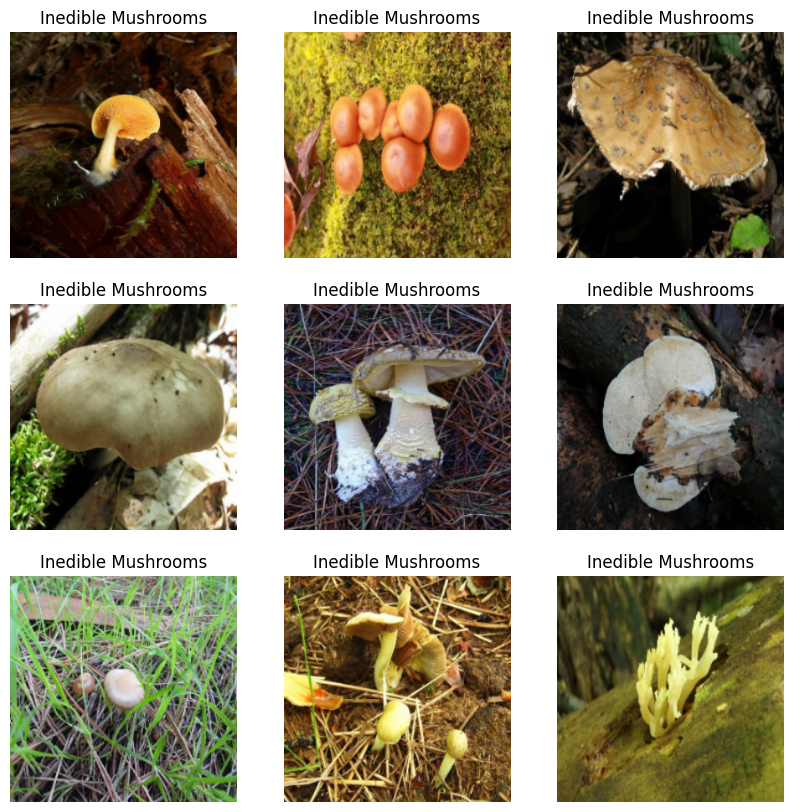

In [42]:
#Check the original images :

# The dataset is very highly imbalanced. Only picking the inedbile images??
plt.figure(figsize=(10, 10))
for images, labels in train_ds1.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [44]:
# Check for outlier images:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Initialize variables to calculate mean and std
pixel_sums = 0
pixel_sums_squared = 0
num_samples = 0

# Iterate over unbatched dataset to calculate mean and std
for images, _ in train_ds.unbatch():
  pixel_sums += tf.reduce_sum(images, axis=[0, 1, 2])
  pixel_sums_squared += tf.reduce_sum(tf.square(images), axis=[0, 1, 2])
  num_samples += images.shape[0]

# Calculate mean and standard deviation
mean = pixel_sums / num_samples
std = tf.sqrt((pixel_sums_squared / num_samples) - tf.square(mean))

# Define a function to detect outliers
def is_outlier(image, mean, std, threshold=3):
    distance_from_mean = tf.abs(image - mean)
    return tf.reduce_any(distance_from_mean > (threshold * std))

# Collect outliers
outliers = [(image, label) for image, label in train_ds.unbatch() if is_outlier(image, mean, std)]

# Print the number of outliers
print(f"Number of outlier images: {len(outliers)}")

# Visualize outliers
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(outliers[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Label: {class_names[label]}")
    plt.axis("off")
plt.show()


KeyboardInterrupt: 

In [ ]:
# Check number of images in each class/ imbalances in the data:

class_counts = {}
for images, labels in dataset:
  for label in labels:
    class_name = class_names[label]
    if class_name not in class_counts:
      class_counts[class_name] = 0
    class_counts[class_name] += 1

for class_name, count in class_counts.items():
  print(f"Class: {class_name}, Count: {count}")